<a href="https://colab.research.google.com/github/ArnabSen08/Machine-Learning-Code/blob/main/Implementation_of_Moving_Average_techniques_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pip --user -q --no-warn-script-location
!pip install numpy pandas sklearn matplotlib --user -q --no-warn-script-location

  Preparing metadata (setup.py) ... done


In [2]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 15, 10
warnings.filterwarnings('ignore')

In [3]:
## reading the data 
data = pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/AirPassengers.csv')

In [4]:
#looking at the dataset
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
#looking at the shape of the data
data.shape

(144, 2)

In [6]:
#Finding null values
data.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [7]:
#looking at the dataset
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [8]:
## Using frequency as monthly
date=pd.date_range(start='1/1/1949',end='12/31/1960',freq='M') 
date

DatetimeIndex(['1949-01-31', '1949-02-28', '1949-03-31', '1949-04-30',
               '1949-05-31', '1949-06-30', '1949-07-31', '1949-08-31',
               '1949-09-30', '1949-10-31',
               ...
               '1960-03-31', '1960-04-30', '1960-05-31', '1960-06-30',
               '1960-07-31', '1960-08-31', '1960-09-30', '1960-10-31',
               '1960-11-30', '1960-12-31'],
              dtype='datetime64[ns]', length=144, freq='M')

In [9]:
data['date_time']= date
data.head()

,Month,#Passengers,date_time
0,1949-01,112,1949-01-31
1,1949-02,118,1949-02-28
2,1949-03,132,1949-03-31
3,1949-04,129,1949-04-30
4,1949-05,121,1949-05-31


In [10]:
## Dropping object type feature from the data
data.drop('Month',axis=1,inplace=True)
data.head()

,#Passengers,date_time
0,112,1949-01-31
1,118,1949-02-28
2,132,1949-03-31
3,129,1949-04-30
4,121,1949-05-31


In [11]:
## resetting index to time series attribute
data = data.set_index('date_time') 
data.head()

,#Passengers
date_time,
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121


In [12]:
#renaming the columns
data.columns = ['Passengers']
data.head()

,Passengers
date_time,
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121


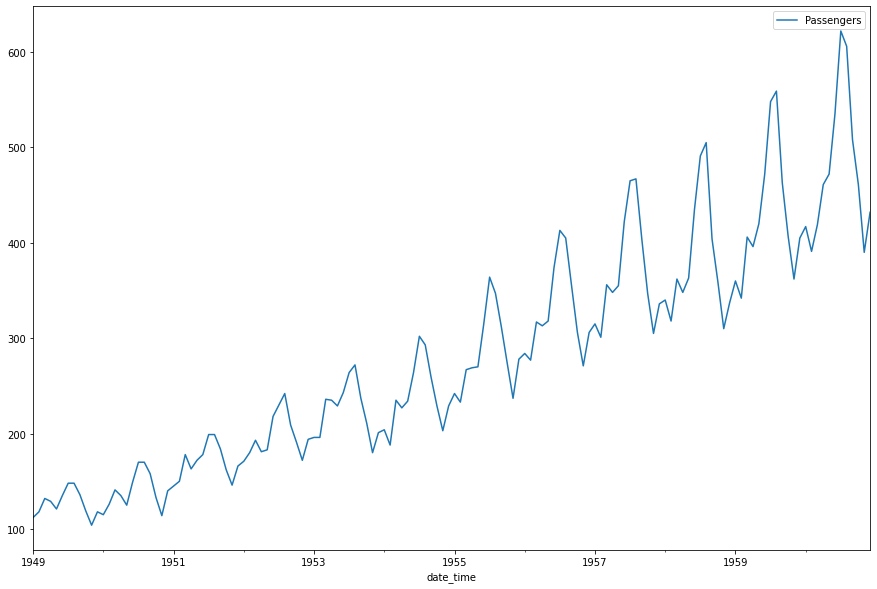

In [13]:
data.plot()
plt.show()

In [14]:
data['moving_average']= data.Passengers.rolling(10).mean()

In [15]:
data.reset_index()

,date_time,Passengers,moving_average
0,1949-01-31,112,NaN
1,1949-02-28,118,NaN
2,1949-03-31,132,NaN
3,1949-04-30,129,NaN
4,1949-05-31,121,NaN
...,...,...,...
139,1960-08-31,606,469.0
140,1960-09-30,508,483.6
141,1960-10-31,461,489.2
142,1960-11-30,390,486.5


Text(0.5, 0, 'Date')

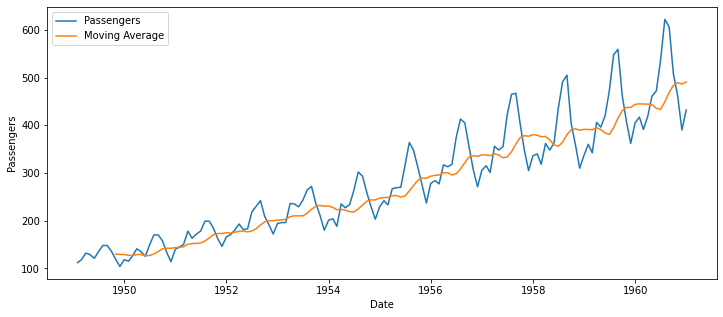

In [16]:
# set figure size
plt.figure( figsize = ( 12, 5))

# plot a simple time series plot using seaborn.lineplot()
sns.lineplot( x = 'date_time',
			y = 'Passengers',
			data = data, label = 'Passengers')

# plot using moving average
sns.lineplot( x = 'date_time',
			y = 'moving_average',
			data = data, label = 'Moving Average')

plt.xlabel('Date')

In [17]:
data['Cummulative_Average']= data['Passengers'].expanding().mean()

In [18]:
data.head()

,Passengers,moving_average,Cummulative_Average
date_time,,,
1949-01-31,112,NaN,112.000000
1949-02-28,118,NaN,115.000000
1949-03-31,132,NaN,120.666667
1949-04-30,129,NaN,122.750000
1949-05-31,121,NaN,122.400000


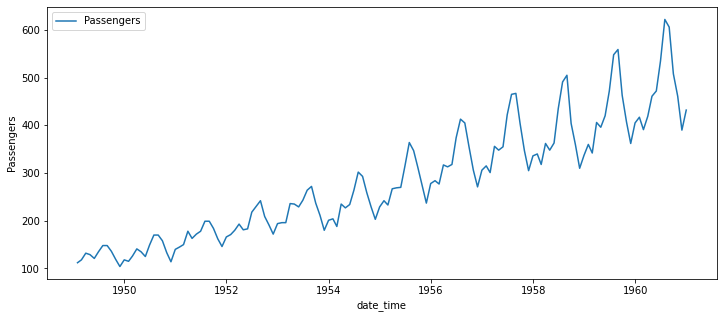

In [20]:
# set figure size
plt.figure( figsize = ( 12, 5))

# plot a simple time series plot
# using seaborn.lineplot()
sns.lineplot( x = 'date_time',
			y = 'Passengers',
			data = data, label = 'Passengers')



In [21]:
# set figure size
plt.figure( figsize = ( 12, 5))

# plot a simple time series plot
# using seaborn.lineplot()


# plot using Cumumulative Moving average
sns.lineplot( x = 'date_time',
			y = 'Cumulative_Average',
			data = data, label = 'Cumulative Moving Average')

plt.xlabel('Date')

ValueError: ignored

<Figure size 864x360 with 0 Axes>

In [22]:
#Calculating the Cumulative Moving Average
data['Cumulative_Average']= data['Passengers'].expanding().mean()

In [23]:
#Viewing the dataset
data.head()

,Passengers,moving_average,Cummulative_Average,Cumulative_Average
date_time,,,,
1949-01-31,112,NaN,112.000000,112.000000
1949-02-28,118,NaN,115.000000,115.000000
1949-03-31,132,NaN,120.666667,120.666667
1949-04-30,129,NaN,122.750000,122.750000
1949-05-31,121,NaN,122.400000,122.400000


Text(0.5, 0, 'Date')

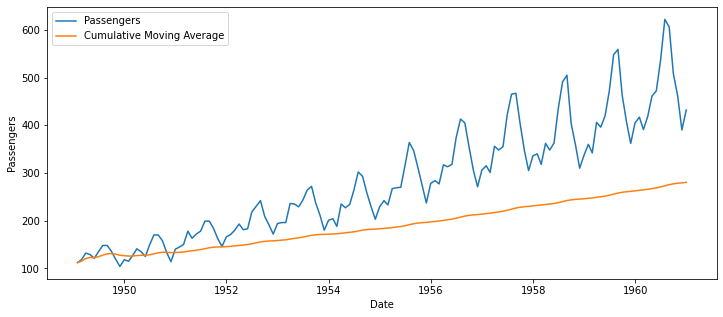

In [24]:
# set figure size
plt.figure( figsize = ( 12, 5))

# plot a simple time series plot
# using seaborn.lineplot()
sns.lineplot( x = 'date_time',
			y = 'Passengers',
			data = data, label = 'Passengers')

# plot using Cumumulative Moving average
sns.lineplot( x = 'date_time',
			y = 'Cumulative_Average',
			data = data, label = 'Cumulative Moving Average')

plt.xlabel('Date')